# 1. Correlation Matrix
Check the answers to Q.1 of the survey. In particular, create a correlation matrix of the answers to the 29 questions and discuss (i) whether there are any high correlations, and (ii) what these correlations imply.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gp
from sklearn import decomposition as dcp
from collections import Counter
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing

In [2]:
data = pd.read_csv('Data_boats.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 82 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   RESPID      2813 non-null   int64
 1   Q1.1        2813 non-null   int64
 2   Q1.2        2813 non-null   int64
 3   Q1.3        2813 non-null   int64
 4   Q1.4        2813 non-null   int64
 5   Q1.5        2813 non-null   int64
 6   Q1.6        2813 non-null   int64
 7   Q1.7        2813 non-null   int64
 8   Q1.8        2813 non-null   int64
 9   Q1.9        2813 non-null   int64
 10  Q1.10       2813 non-null   int64
 11  Q1.11       2813 non-null   int64
 12  Q1.12       2813 non-null   int64
 13  Q1.13       2813 non-null   int64
 14  Q1.14       2813 non-null   int64
 15  Q1.15       2813 non-null   int64
 16  Q1.16       2813 non-null   int64
 17  Q1.17       2813 non-null   int64
 18  Q1.18       2813 non-null   int64
 19  Q1.19       2813 non-null   int64
 20  Q1.20       2813 non-null   in

In [4]:
#checking if there are no empty values
data.isna().sum()

RESPID    0
Q1.1      0
Q1.2      0
Q1.3      0
Q1.4      0
         ..
Q16.25    0
Q16.26    0
Q16.27    0
Q17       0
Q18       0
Length: 82, dtype: int64

In [5]:
data.columns

Index(['RESPID', 'Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6', 'Q1.7',
       'Q1.8', 'Q1.9', 'Q1.10', 'Q1.11', 'Q1.12', 'Q1.13', 'Q1.14', 'Q1.15',
       'Q1.16', 'Q1.17', 'Q1.18', 'Q1.19', 'Q1.20', 'Q1.21', 'Q1.22', 'Q1.23',
       'Q1.24', 'Q1.25', 'Q1.26', 'Q1.27', 'Q1.28', 'Q1.29', 'Q2',
       'Q2.Cluster', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4',
       'Q8', 'Q9.1', 'Q9.2', 'Q9.3', 'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12',
       'Q13', 'Q14', 'Q15', 'Q16', 'Q16.1', 'Q16.2', 'Q16.3', 'Q16.4', 'Q16.5',
       'Q16.6', 'Q16.7', 'Q16.8', 'Q16.9', 'Q16.10', 'Q16.11', 'Q16.12',
       'Q16.13', 'Q16.14', 'Q16.15', 'Q16.16', 'Q16.17', 'Q16.18', 'Q16.19',
       'Q16.20', 'Q16.21', 'Q16.22', 'Q16.23', 'Q16.24', 'Q16.25', 'Q16.26',
       'Q16.27', 'Q17', 'Q18'],
      dtype='object')

In [6]:
#keeping only Q1 data to use for 1. 

data_clean= data.drop(['RESPID','Q2','Q2.Cluster', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4',
       'Q8', 'Q9.1', 'Q9.2', 'Q9.3', 'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12',
       'Q13', 'Q14', 'Q15', 'Q16', 'Q16.1', 'Q16.2', 'Q16.3', 'Q16.4', 'Q16.5',
       'Q16.6', 'Q16.7', 'Q16.8', 'Q16.9', 'Q16.10', 'Q16.11', 'Q16.12',
       'Q16.13', 'Q16.14', 'Q16.15', 'Q16.16', 'Q16.17', 'Q16.18', 'Q16.19',
       'Q16.20', 'Q16.21', 'Q16.22', 'Q16.23', 'Q16.24', 'Q16.25', 'Q16.26',
       'Q16.27', 'Q17', 'Q18'],axis=1)

In [7]:
#finding the correlation for each question
#correlation measure the strength and direction of a linear relation between two vairables
cor = data_clean.corr()

#.set_precision = liits the digits
#axis=None = computing colors based on entire matrox rather than per column or row
cor.style.background_gradient(cmap='coolwarm',axis=None).set_precision(3)

/var/folders/zz/9yhsg1094_32rjdjwt0gvmpm0000gn/T/ipykernel_86672/4253271928.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor.style.background_gradient(cmap='coolwarm',axis=None).set_precision(3)


,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,Q1.11,Q1.12,Q1.13,Q1.14,Q1.15,Q1.16,Q1.17,Q1.18,Q1.19,Q1.20,Q1.21,Q1.22,Q1.23,Q1.24,Q1.25,Q1.26,Q1.27,Q1.28,Q1.29
Q1.1,1.000,0.009,0.107,0.198,0.184,0.268,0.185,0.089,0.078,0.107,0.145,-0.053,0.123,0.179,0.261,0.157,0.148,0.253,0.274,0.194,0.235,0.231,0.188,0.209,0.227,0.104,0.127,0.176,0.202
Q1.2,0.009,1.000,-0.030,-0.210,-0.206,-0.037,0.020,0.197,0.087,0.158,0.043,0.370,0.006,-0.030,-0.078,-0.015,0.039,-0.038,-0.036,0.053,-0.099,-0.076,0.003,-0.076,0.009,0.074,0.045,0.016,-0.029
Q1.3,0.107,-0.030,1.000,0.264,0.400,0.340,0.444,-0.051,0.579,0.136,0.096,-0.089,0.485,0.462,0.376,0.387,0.379,0.238,0.141,0.386,0.182,0.281,0.340,0.228,0.358,0.471,0.401,0.425,0.166
Q1.4,0.198,-0.210,0.264,1.000,0.367,0.202,0.175,0.004,0.168,0.100,0.059,-0.160,0.273,0.294,0.296,0.182,0.175,0.185,0.185,0.183,0.183,0.234,0.164,0.229,0.218,0.192,0.165,0.212,0.187
Q1.5,0.184,-0.206,0.400,0.367,1.000,0.293,0.285,-0.033,0.329,0.136,0.069,-0.172,0.450,0.460,0.418,0.355,0.318,0.234,0.184,0.323,0.187,0.274,0.293,0.249,0.290,0.337,0.294,0.325,0.178
Q1.6,0.268,-0.037,0.340,0.202,0.293,1.000,0.546,0.040,0.349,0.125,0.146,-0.115,0.286,0.314,0.314,0.272,0.236,0.438,0.356,0.354,0.424,0.409,0.318,0.367,0.420,0.307,0.345,0.392,0.271
Q1.7,0.185,0.020,0.444,0.175,0.285,0.546,1.000,-0.006,0.491,0.122,0.115,-0.109,0.349,0.362,0.345,0.309,0.285,0.401,0.282,0.363,0.327,0.390,0.304,0.333,0.419,0.386,0.371,0.399,0.241
Q1.8,0.089,0.197,-0.051,0.004,-0.033,0.040,-0.006,1.000,-0.092,0.085,0.143,0.235,-0.048,-0.022,0.061,0.023,0.048,0.074,0.095,0.043,0.063,0.054,0.099,0.019,0.099,-0.045,0.029,0.046,0.097
Q1.9,0.078,0.087,0.579,0.168,0.329,0.349,0.491,-0.092,1.000,0.143,0.060,-0.044,0.480,0.427,0.333,0.389,0.366,0.218,0.074,0.366,0.144,0.232,0.289,0.230,0.319,0.503,0.400,0.402,0.115
Q1.10,0.107,0.158,0.136,0.100,0.136,0.125,0.122,0.085,0.143,1.000,-0.089,0.122,0.161,0.105,0.111,-0.030,-0.028,0.141,0.095,0.096,0.077,0.091,0.070,0.131,0.076,0.135,0.077,0.069,0.051


### Understanding the Correlation Matrix
From the correlation matrix, it is evident that there are many features that are correlated with an absolute value of greater than 0.3.
For example Q1.3 and Q1.9 (corr=0.579) and they both describe a customer's alignment towards brand reputation. Similarly, Q1.27 and Q1.28 (corr=0.615) decribe customers' choice of boating as a hobby. Consider Q1.13 and Q1.14 (corr=0.638) indicate customers' preferences towards staying up to date with their boating equipments. Q1.16 and Q1.17 (corr=0.631) reflect customers' expertise on boating. 
Although there are other highly correlated features, the essence is that if we include all the features as it is in our clustering, we will increase the complexity of interpreting the attributes of the clusters. Moreover, if we remove these features entirely, we may also limit ourselves from having a better understanding of the clusters since the Questionnaire may have been made to capture essential information. Therefore, PCA in this case can be instrumental in saving the variety of cluster information whilst reducing the complexity arising from the multidimensionality. 

# 2 - PCA

In [9]:
#covariance to check how much variance is explained by each Question.
data_clean.cov()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q1.20,Q1.21,Q1.22,Q1.23,Q1.24,Q1.25,Q1.26,Q1.27,Q1.28,Q1.29
Q1.1,0.671686,0.007463,0.089926,0.133233,0.139530,0.180866,0.135749,0.059301,0.068630,0.081799,...,0.154182,0.140215,0.140210,0.157357,0.129945,0.169813,0.089336,0.109058,0.141748,0.120773
Q1.2,0.007463,1.027595,-0.030593,-0.174622,-0.193535,-0.031138,0.018420,0.162850,0.095163,0.149501,...,0.052416,-0.073308,-0.057270,0.002954,-0.058033,0.008219,0.078569,0.048343,0.015951,-0.021455
Q1.3,0.089926,-0.030593,1.042479,0.220692,0.378541,0.286198,0.406412,-0.042539,0.636192,0.129007,...,0.381514,0.135098,0.212303,0.354864,0.176261,0.333547,0.505096,0.429331,0.426600,0.123819
Q1.4,0.133233,-0.174622,0.220692,0.672218,0.278858,0.136197,0.128985,0.002520,0.147924,0.076456,...,0.145628,0.109126,0.141482,0.137818,0.142427,0.163093,0.165568,0.141916,0.171105,0.111773
Q1.5,0.139530,-0.193535,0.378541,0.278858,0.860425,0.223937,0.237564,-0.025160,0.328158,0.117314,...,0.290281,0.126312,0.187638,0.278588,0.175304,0.245673,0.328544,0.286089,0.296207,0.120570
Q1.6,0.180866,-0.031138,0.286198,0.136197,0.223937,0.679294,0.403741,0.027160,0.309544,0.095647,...,0.282773,0.254247,0.248998,0.268180,0.229347,0.315876,0.266065,0.298000,0.317760,0.163538
Q1.7,0.135749,0.018420,0.406412,0.128985,0.237564,0.403741,0.805022,-0.004140,0.473968,0.101725,...,0.315880,0.213582,0.258701,0.279561,0.226402,0.343360,0.364209,0.348845,0.352053,0.157780
Q1.8,0.059301,0.162850,-0.042539,0.002520,-0.025160,0.027160,-0.004140,0.666735,-0.080749,0.064764,...,0.034275,0.037490,0.032657,0.082999,0.011518,0.073801,-0.038196,0.025010,0.036733,0.058083
Q1.9,0.068630,0.095163,0.636192,0.147924,0.328158,0.309544,0.473968,-0.080749,1.158463,0.143456,...,0.381719,0.112325,0.184907,0.318032,0.188055,0.313339,0.568256,0.451259,0.425624,0.090210
Q1.10,0.081799,0.149501,0.129007,0.076456,0.117314,0.095647,0.101725,0.064764,0.143456,0.868205,...,0.086941,0.052083,0.062753,0.066328,0.092723,0.064622,0.131945,0.075372,0.063368,0.034785


In [10]:
# creating a list of the individual variances i.e. diagonals to understand the total variance
vars = np.diag(data_clean.cov())
print(vars.sum())

# ratio of variance contributed by each question, to understanded which questions currently dominate the total variance.
df_vars = pd.DataFrame({'Questions': np.arange(1,30), 'Variance_Ratio': (vars/vars.sum())}).set_index('Questions').sort_values('Variance_Ratio', ascending=False)
df_vars
# all questions seem to explain only a small percentage of variance

24.801012015439394


,Variance_Ratio
Questions,
11,0.053471
9,0.046710
26,0.044479
27,0.044372
16,0.044137
23,0.042241
3,0.042034
2,0.041434
12,0.041201


In [11]:
# Running PCA; scaling not needed because the features have comparable units i.e. same scale of questionnaire responses. 
pca=dcp.PCA(n_components=29)
pca.fit(data_clean)

PCA(n_components=29)

In [12]:
pca.components_

array([[-9.09462511e-02,  5.98230875e-03, -2.52079637e-01,
        -1.12166975e-01, -1.94237316e-01, -1.74605944e-01,
        -2.05306979e-01, -1.01082650e-02, -2.55101372e-01,
        -5.41549695e-02, -1.27103653e-01,  4.65780774e-02,
        -2.41985665e-01, -2.44645043e-01, -2.10848556e-01,
        -2.64387120e-01, -2.30240194e-01, -1.30337710e-01,
        -9.62748730e-02, -2.41932687e-01, -1.05950209e-01,
        -1.43695698e-01, -2.22488100e-01, -1.19195529e-01,
        -2.05590888e-01, -2.55056436e-01, -2.61983424e-01,
        -2.58200333e-01, -9.99668422e-02],
       [ 3.27415969e-02, -4.74888433e-01,  7.63413782e-02,
         1.91861889e-01,  2.05131283e-01,  8.99960114e-02,
         7.78827311e-02, -2.12744290e-01,  1.23918145e-02,
         7.89044926e-04, -3.93347304e-01, -5.25339730e-01,
         6.93930799e-02,  9.71951399e-02,  7.37990694e-02,
        -1.81607585e-01, -1.99604241e-01,  1.00268768e-01,
         8.29172647e-02, -1.38382900e-01,  1.19378054e-01,
         6.76

In [13]:
# we have our initial PCA here, which matches the total variance observed above in the covariance matrix.
print(pca.explained_variance_)
pca.explained_variance_.sum()

[7.50390224 1.83708163 1.67162561 1.4346473  0.99481279 0.9225859
 0.72772437 0.682431   0.65812527 0.60203078 0.55941266 0.54825455
 0.53301469 0.52363144 0.48214048 0.46677927 0.45424564 0.43568519
 0.43149923 0.40868665 0.38210706 0.37838019 0.35692105 0.34063044
 0.31975098 0.31171055 0.30281006 0.26812132 0.26226365]


24.801012015439383

In [14]:
pca.explained_variance_ratio_
# the first component clearly seems to explain alomost 1/3rd of the total variance and then there is a drastic drop on to the second component,
# but from there on the reduction towards the 29th component is quite gradual. 
# Compared with the 29 Questions, the level of variance explained by each component changes more evidently.  

array([0.30256436, 0.07407285, 0.06740151, 0.05784632, 0.04011178,
       0.03719953, 0.02934253, 0.02751626, 0.02653623, 0.02427444,
       0.02255604, 0.02210614, 0.02149165, 0.02111331, 0.01944036,
       0.01882098, 0.01831561, 0.01756723, 0.01739845, 0.01647863,
       0.01540691, 0.01525664, 0.01439139, 0.01373454, 0.01289266,
       0.01256846, 0.01220958, 0.0108109 , 0.01057472])

In [15]:
#compute the cumulative sum
np.cumsum(pca.explained_variance_ratio_) 

# Here, it is noticable that the first 16 meet the 80% mark, and then each of the 13 consecutive components continue adding but little by little. 5 components give roughly 54%, and the jump from 4
# to 5 components add 3% more variance. 

array([0.30256436, 0.37663721, 0.44403871, 0.50188504, 0.54199682,
       0.57919634, 0.60853887, 0.63605513, 0.66259135, 0.6868658 ,
       0.70942184, 0.73152798, 0.75301963, 0.77413294, 0.79357329,
       0.81239427, 0.83070988, 0.84827711, 0.86567556, 0.88215419,
       0.89756111, 0.91281775, 0.92720914, 0.94094368, 0.95383634,
       0.9664048 , 0.97861438, 0.98942528, 1.        ])

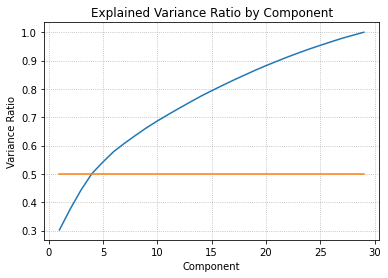

In [31]:
# Visualising the variances to get a deeper understanding to decide which components to drop at this stage.

plt.title("Explained Variance Ratio by Component")
plt.plot(np.arange(1,30),np.cumsum(pca.explained_variance_ratio_)) #so that the first component is at 1, not 0
plt.plot([1,29],[0.5,0.5])
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.grid(ls=':')
plt.show()
# As noticed earlier, the magnitude of marignal unit variance keeps diminishing by consecutive components especially after the 5th component. 

In [32]:
pca.explained_variance_

array([7.50390224, 1.83708163, 1.67162561, 1.4346473 , 0.99481279,
       0.9225859 , 0.72772437, 0.682431  , 0.65812527, 0.60203078,
       0.55941266, 0.54825455, 0.53301469, 0.52363144, 0.48214048,
       0.46677927, 0.45424564, 0.43568519, 0.43149923, 0.40868665,
       0.38210706, 0.37838019, 0.35692105, 0.34063044, 0.31975098,
       0.31171055, 0.30281006, 0.26812132, 0.26226365])

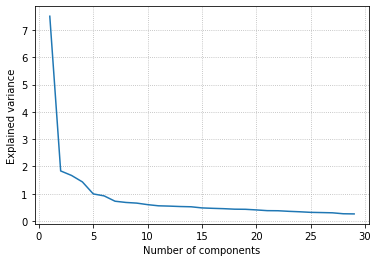

In [33]:
plt.plot(np.arange(1,30),pca.explained_variance_)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.grid(ls=':')
plt.show()
# the kinks appear at various levels - the more prominent one being at n=2, then n=5, and n=7


In [34]:
# creating the dataframe with final PCA values with 29 components. 
n=29
data_pca = pca.fit_transform(data_clean) 
Zs = ['z' + str(n) for n in range(1,30)]
df_PCA_done = pd.DataFrame()
for i in range(len(Zs)): 
    df_PCA_done[Zs[i]] = data_pca[:,i].reshape(-1) 
df_PCA_done = df_PCA_done.iloc[:,0:n]    
df_PCA_done

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,...,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29
0,-5.596516,3.690842,0.885739,-0.254143,0.448955,-0.074724,-0.236484,-0.716726,-0.503223,0.468480,...,-0.008872,-0.500813,-0.332964,0.003322,0.142942,-0.011273,0.120045,-0.107545,0.081668,-0.186992
1,-2.069061,1.641866,1.563596,-0.009273,-0.140936,-0.725680,0.272806,0.605021,0.667137,-0.471550,...,-0.863122,0.742552,-0.051107,0.150916,-0.027878,-0.208744,0.336053,0.355625,-0.230662,0.548792
2,-2.718634,2.614583,2.716644,1.898413,0.446054,0.150514,-0.303173,-0.337087,-0.309635,-0.076238,...,-0.773530,0.002049,0.346358,0.308034,0.087324,0.125598,0.408580,-0.814738,0.926132,0.140392
3,-2.797228,1.406989,-0.281461,0.825179,1.968746,0.516513,-1.104801,-0.650354,0.635017,0.127052,...,0.076747,-0.940883,-0.272426,0.712061,0.586583,-1.211608,-0.885937,-0.545345,-0.776650,0.595167
4,-5.301887,0.697143,0.579743,1.680212,0.910385,-0.604045,-0.159096,-0.524777,0.783227,0.641165,...,-0.263662,0.397358,-0.053084,-0.523843,0.231809,-1.155740,0.899274,0.676781,0.185167,0.092471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,-2.659766,2.587872,-0.391803,1.754867,-2.258468,-0.851969,0.880011,-0.149710,-1.061737,0.543065,...,1.853915,0.829687,1.227445,0.527201,2.170991,1.386521,0.186320,0.545187,0.536888,0.584844
2809,9.008467,-1.903317,2.220632,5.760613,-1.085995,-1.965775,1.354662,0.065810,0.836209,2.124343,...,-0.435174,0.914734,0.502555,-0.216795,0.400211,0.701730,1.322180,-0.826723,0.352014,0.953040
2810,0.537434,-1.188677,2.207344,1.075539,-0.124167,-1.023950,1.066410,-0.184399,0.231594,-0.712419,...,-0.116031,0.368147,-0.487026,0.427900,0.415499,0.572653,-0.196349,0.640122,-0.720520,-0.308333
2811,0.223975,-0.906015,0.560732,2.042514,0.862498,0.911532,1.056095,-0.608549,-0.700848,-0.229232,...,0.808887,0.914038,1.167756,0.052386,-0.349492,0.912196,0.443135,-0.250393,0.213250,1.043229


In [35]:
# creating the dataframe with 5 PCA components. No sparsity here because the 5 components already cover a low percentage of variance and pushing some loadings to zero will diminish the information further.
n=5
data_pca = pca.fit_transform(data_clean) 
Zs = ['z' + str(n) for n in range(1,30)]
df_PCA_5 = pd.DataFrame()
for i in range(len(Zs)):
    df_PCA_5[Zs[i]] = data_pca[:,i].reshape(-1) 
df_PCA_5= df_PCA_done.iloc[:,0:n]    
df_PCA_5 #use this dataframe along with the other questions to try clustering with 5 components. 

,z1,z2,z3,z4,z5
0,-5.596516,3.690842,0.885739,-0.254143,0.448955
1,-2.069061,1.641866,1.563596,-0.009273,-0.140936
2,-2.718634,2.614583,2.716644,1.898413,0.446054
3,-2.797228,1.406989,-0.281461,0.825179,1.968746
4,-5.301887,0.697143,0.579743,1.680212,0.910385
...,...,...,...,...,...
2808,-2.659766,2.587872,-0.391803,1.754867,-2.258468
2809,9.008467,-1.903317,2.220632,5.760613,-1.085995
2810,0.537434,-1.188677,2.207344,1.075539,-0.124167
2811,0.223975,-0.906015,0.560732,2.042514,0.862498


In [36]:
df_PCA_5.cov()

,z1,z2,z3,z4,z5
z1,7.503902e+00,-3.866040e-16,3.651260e-15,3.066300e-15,-7.814201e-16
z2,-3.866040e-16,1.837082e+00,-2.027776e-15,3.366992e-16,3.142737e-16
z3,3.651260e-15,-2.027776e-15,1.671626e+00,1.306368e-15,-1.305578e-15
z4,3.066300e-15,3.366992e-16,1.306368e-15,1.434647e+00,-9.096564e-16
z5,-7.814201e-16,3.142737e-16,-1.305578e-15,-9.096564e-16,9.948128e-01


In [37]:
# checking the loadings for every question at every component. 
n = 5
loadings = pd.DataFrame(pca.components_[0:n,:].T).set_index(np.arange(1,30)) 
loadings.columns = Zs[0:n]
loadings.index = data_clean.columns
loadings

,z1,z2,z3,z4,z5
Q1.1,-0.090946,0.032742,-0.216683,-0.120257,0.184008
Q1.2,0.005982,-0.474888,0.168827,-0.376695,0.070076
Q1.3,-0.252080,0.076341,0.231441,-0.020792,0.028762
Q1.4,-0.112167,0.191862,-0.061916,0.032294,0.260292
Q1.5,-0.194237,0.205131,0.045676,0.090574,0.294720
Q1.6,-0.174606,0.089996,-0.152005,-0.205122,-0.113048
Q1.7,-0.205307,0.077883,-0.021382,-0.210249,-0.152496
Q1.8,-0.010108,-0.212744,-0.162031,-0.157224,0.182006
Q1.9,-0.255101,0.012392,0.351427,-0.098570,-0.084008
Q1.10,-0.054155,0.000789,0.114534,-0.435828,0.395639


In [38]:
n=10
pca_sparse10 =dcp.SparsePCA(alpha=6,n_components=n)
data_PCA_sparse10 = pca_sparse10.fit_transform(data_clean) 
Zs = ['z' + str(n) for n in range(1,n+1)] # can change the number of z's by changing the upper limit of the range to the number of z's (n_components) needed. 
df_PCA_sparse10 = pd.DataFrame()
for i in range(len(Zs)):
    df_PCA_sparse10[Zs[i]] = data_PCA_sparse10[:,i].reshape(-1) 
df_PCA_sparse10 #use for clustering with 10 components.

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10
0,0.668881,-1.962323,2.686720,1.446959,3.210382,3.398266,-1.901101,1.422321,0.626863,1.357909
1,0.947654,-1.001997,0.303125,0.456860,1.616371,1.892806,-0.827215,-0.557877,0.626863,-0.177124
2,-0.255092,-1.247278,-0.512667,1.446959,3.131141,2.240956,-1.807806,0.432222,-0.363236,1.295402
3,-0.246782,-1.002412,1.131215,-0.533239,3.140597,0.268142,-0.823472,1.422321,0.626863,0.728992
4,1.290682,-1.715566,0.559241,-1.523338,2.768832,2.928672,-0.947672,1.422321,0.626863,2.648351
...,...,...,...,...,...,...,...,...,...,...
2808,0.399044,-2.207479,1.620800,0.456860,-0.443711,1.764076,-2.106586,0.432222,-1.353335,2.518213
2809,-3.848550,-0.530243,-7.680250,-1.523338,-4.828029,-2.290487,-1.624782,-2.538075,-1.353335,0.407515
2810,0.160096,0.917654,-2.465958,-0.533239,0.055260,1.478233,0.145331,-0.557877,-0.363236,-0.151676
2811,-0.280546,1.163007,-1.794308,-0.533239,0.768568,-0.502995,-0.877708,0.432222,-0.363236,1.237655


In [39]:
# checking and setting the alpha parameters for sparsity of 10 components
# 6 seems like the best trade-off: tried using 5,4,3 and 2 but z3 was having loadings of many questions. Alpha 6 reduced the number and magnitude of some loadings added to z3.
# Hence, alpha=6 was finalised for PCA with 10 components - being the main one. 
n=10 
pca_sparse10=dcp.SparsePCA(alpha=6,n_components=n)
pca_sparse10.fit(data_clean)
loadings_sparse10=pd.DataFrame(pca_sparse10.components_.T).set_index(np.arange(1,30))
loadings_sparse10.columns = Zs[0:n]
loadings_sparse10.index = data_clean.columns
loadings_sparse10


,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10
Q1.1,0.000000,0.000000,0.219206,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Q1.2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.991117,0.0,0.0,0.000000
Q1.3,0.000000,0.000000,0.000000,0.0,0.000000,0.574089,0.000000,0.0,0.0,0.000000
Q1.4,0.000000,0.000000,0.014846,0.0,0.197542,0.000000,-0.103614,0.0,0.0,0.000000
Q1.5,0.000000,0.000000,0.000000,0.0,0.430317,0.000000,-0.083380,0.0,0.0,0.000000
Q1.6,0.000000,0.000000,0.399459,0.0,0.000000,0.034993,0.000000,0.0,0.0,0.000000
Q1.7,0.000000,0.000000,0.296238,0.0,0.000000,0.230051,0.000000,0.0,0.0,0.000000
Q1.8,0.000000,0.248147,0.002041,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Q1.9,0.000000,0.000000,0.000000,0.0,0.000000,0.654755,0.000000,0.0,0.0,0.000000
Q1.10,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000


### Rationale for the choice of number of components:
Eligible number of components to perform clustering at n = 5,10,16 (from both the variance vs components plots). This is because although the first kink appears at n=2, the explained variance is not sufficient at this level. The next kinks are at 4 and 5 and they add more than 50% variance but 5 components contribute a little more than 4. With 16 components, we cross 80% variance but the increment by adding more components afterwards keeps diminishing.
Keeping in mind the trade-off between explained variance and increased interpretability we can approach 10 components because they explain almost 69% variance. Especially because our core features were 29, 10 features also provide a feasible interpretability. We will use 5 and 16 components in addition to test the robustness of our results. 


Further, CreeqBoat needs to manage value/devise ways to deliver value to consumer - hence the survey. The key value for them is the increase of revenue. And the selected components, help address this value in terms of quality, variety, access and passion The reason of choosing 10 components was it gives the right balance of features that add value in the consumer understanding for creeboat, as choosing 5 - we would have the features overlapping and condensed. Having 16 components would spread the feature too thin to have any validity  in understanding the consumers





### Interpreting the components: 

Q1.13 and Q1.14 had a high correlation of 0.638 (correlation matrix), and they both also explained a similar ratio of variance. Looking at the loadings, we can see that both these Questions have been fitted into z5 as one component; this aligns with the logic that highly correlated features can increase dimensionality whilst not contributing much new information. The PCA has been able to condense the information provided by these two features into one single component without needing to eliminate value added by any of the features from our analysis. Other highly correlated features have been given the same treatment. Similarly, Q1.3 and Q1.9 are in z6 and Q1.16 and Q1.17 in z10.

The components can be interpreted by looking at the number of questions with substantial loadings in each component and then understanding what customer trait each question is trying to measure. Here is a breakdown of each component:
- Z1: Boating passion (Q1.20, Q1.27, Q1.28) 
- Z2: Functionality vs style (Q1.8, Q1.12) 
- Z3: Boating as a hobby (Q1.1, Q1.6, Q1.18, Q1.19, Q1.21, Q1.22, Q1.24, Q1.25, Q1.29)
- Z4: Product involvement (Q1.11)
- Z5: Sensitivity to high tech and brand reputation (Q1.4, Q1.5, Q1.13, Q1.14, Q1.15)
- Z6: Boating as a sign of prestige (Q1.3, Q1.7, Q1.9, Q1.26) 
- Z7: Propensity to spend money (Q1.2) 
- Z8: Boating for a sport (Q1.23)
- Z9: Confidence in decision-making (Q1.10)
- Z10: Boating expertise (Q1.16, Q1.17)

In [40]:
# the loss in variance between using 10 components with alpha=0 and alpha=6 is of roughly 6%.
np.sum(np.diag(df_PCA_sparse10.cov())) / pca.explained_variance_.sum()

0.6311508127050901

In [41]:
n=16 
pca_sparse16=dcp.SparsePCA(alpha=12,n_components=n)
data_PCA_sparse16 = pca_sparse16.fit_transform(data_clean) 
Zs = ['z' + str(n) for n in range(1,n+1)]  
df_PCA_sparse16 = pd.DataFrame()
for i in range(len(Zs)):
    df_PCA_sparse16[Zs[i]] = data_PCA_sparse16[:,i].reshape(-1) 
df_PCA_sparse16 # use this dataframe for clustering 

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16
0,1.393725,-1.837297,-1.446959,-0.905978,2.939712,3.023907,-1.867567,1.422321,0.626863,0.889787,2.032994,-1.197059,0.962293,-0.729991,1.098507,1.433233
1,0.961652,-0.847198,-0.456860,0.084121,1.664592,1.698144,-0.877468,-0.557877,0.626863,-0.100312,1.042895,-0.206960,-1.017905,-0.729991,0.108408,0.443134
2,-0.285137,-0.847198,-1.446959,-0.905978,2.939712,1.448171,-1.867567,0.432222,-0.363236,0.889787,2.032994,-0.206960,-1.017905,-1.720090,0.108408,1.433233
3,-0.053161,-0.847198,0.533239,0.084121,2.939712,-0.179993,-0.877468,1.422321,0.626863,0.889787,1.042895,-1.197059,0.962293,-0.729991,0.108408,1.433233
4,1.431059,-1.837297,1.523338,-1.896077,2.301885,2.403706,-0.877468,1.422321,0.626863,1.879886,2.032994,-0.206960,-0.027806,0.260108,1.098507,1.433233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,0.919944,-1.837297,-0.456860,-1.896077,-1.245704,1.600024,-1.867567,0.432222,-1.353335,1.879886,1.042895,-1.197059,0.962293,-1.720090,1.098507,1.433233
2809,-5.378858,0.142901,1.523338,-0.905978,-3.797010,-2.374112,-1.867567,-2.538075,-1.353335,-0.100312,-1.927402,2.763337,-2.008004,-2.710189,-2.861889,-2.527163
2810,-0.443665,1.133000,0.533239,0.084121,0.209177,1.452520,0.112631,-0.557877,-0.363236,-0.100312,0.052796,0.783139,-1.017905,-0.729991,0.108408,-0.546965
2811,-0.696484,1.133000,0.533239,-0.905978,0.618238,-0.261607,-0.877468,0.432222,-0.363236,0.889787,-0.937303,-0.206960,-0.027806,0.260108,0.108408,0.443134


In [42]:
# checking and setting the alpha parameters for sparsity of 16 components
# alpha 12 seems like the best trade-off: tried using 7,8, 10, 11 but interpretability was getting lost across so many different z's because of multiple questions' loadings existing in multiple z's. 
# Hence, we went back to the previous cell to finalise the alpha parameter to 12 for the dataframe. 
n=16
pca_sparse16=dcp.SparsePCA(alpha=12,n_components=n)
pca_sparse16.fit(data_clean)
loadings_sparse16=pd.DataFrame(pca_sparse16.components_.T).set_index(np.arange(1,30))
loadings_sparse16.columns = Zs[0:n]
loadings_sparse16.index = data_clean.columns
loadings_sparse16

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16
Q1.1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Q1.2,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q1.3,0.000000,0.0,0.0,0.0,0.000000,0.625368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q1.4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Q1.5,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Q1.6,0.237523,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q1.7,0.096548,0.0,0.0,0.0,0.000000,0.287024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q1.8,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Q1.9,0.000000,0.0,0.0,0.0,0.000000,0.725625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q1.10,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df_clust_PCA5 = pd.concat([df_PCA_5, data.iloc[:,30:52]],axis=1)
df_clust_PCA5 #final df for clustering with 5comps(alpha=0)

,z1,z2,z3,z4,z5,Q2,Q2.Cluster,Q3,Q4,Q5,...,Q9.2,Q9.3,Q9.4,Q9.5,Q10,Q11,Q12,Q13,Q14,Q15
0,-5.596516,3.690842,0.885739,-0.254143,0.448955,1,1,4,11,6,...,4,4,4,4,100,2,19,5,1,2
1,-2.069061,1.641866,1.563596,-0.009273,-0.140936,1,1,4,3,8,...,4,4,5,4,30,2,17,5,1,1
2,-2.718634,2.614583,2.716644,1.898413,0.446054,1,1,5,5,8,...,4,4,4,4,30,1,14,5,1,1
3,-2.797228,1.406989,-0.281461,0.825179,1.968746,1,1,4,6,8,...,2,4,3,2,30,1,13,5,1,1
4,-5.301887,0.697143,0.579743,1.680212,0.910385,1,1,4,5,8,...,3,3,3,3,30,1,13,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,-2.659766,2.587872,-0.391803,1.754867,-2.258468,3,1,5,3,1,...,4,5,3,5,40,2,18,1,1,4
2809,9.008467,-1.903317,2.220632,5.760613,-1.085995,1,1,2,4,1,...,3,2,5,1,22,1,16,1,1,3
2810,0.537434,-1.188677,2.207344,1.075539,-0.124167,1,1,4,4,1,...,4,3,4,4,45,1,15,1,1,4
2811,0.223975,-0.906015,0.560732,2.042514,0.862498,0,0,4,11,1,...,3,3,3,3,2,2,11,5,1,2


In [44]:
df_clust_PCA10 = pd.concat([df_PCA_sparse10, data.iloc[:,30:52]],axis=1)
df_clust_PCA10 #final df for clustering with 10comps(alpha=6)

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,...,Q9.2,Q9.3,Q9.4,Q9.5,Q10,Q11,Q12,Q13,Q14,Q15
0,0.668881,-1.962323,2.686720,1.446959,3.210382,3.398266,-1.901101,1.422321,0.626863,1.357909,...,4,4,4,4,100,2,19,5,1,2
1,0.947654,-1.001997,0.303125,0.456860,1.616371,1.892806,-0.827215,-0.557877,0.626863,-0.177124,...,4,4,5,4,30,2,17,5,1,1
2,-0.255092,-1.247278,-0.512667,1.446959,3.131141,2.240956,-1.807806,0.432222,-0.363236,1.295402,...,4,4,4,4,30,1,14,5,1,1
3,-0.246782,-1.002412,1.131215,-0.533239,3.140597,0.268142,-0.823472,1.422321,0.626863,0.728992,...,2,4,3,2,30,1,13,5,1,1
4,1.290682,-1.715566,0.559241,-1.523338,2.768832,2.928672,-0.947672,1.422321,0.626863,2.648351,...,3,3,3,3,30,1,13,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,0.399044,-2.207479,1.620800,0.456860,-0.443711,1.764076,-2.106586,0.432222,-1.353335,2.518213,...,4,5,3,5,40,2,18,1,1,4
2809,-3.848550,-0.530243,-7.680250,-1.523338,-4.828029,-2.290487,-1.624782,-2.538075,-1.353335,0.407515,...,3,2,5,1,22,1,16,1,1,3
2810,0.160096,0.917654,-2.465958,-0.533239,0.055260,1.478233,0.145331,-0.557877,-0.363236,-0.151676,...,4,3,4,4,45,1,15,1,1,4
2811,-0.280546,1.163007,-1.794308,-0.533239,0.768568,-0.502995,-0.877708,0.432222,-0.363236,1.237655,...,3,3,3,3,2,2,11,5,1,2


In [45]:
df_clust_PCA16 = pd.concat([df_PCA_sparse16, data.iloc[:,30:52]],axis=1)
df_clust_PCA16 #final df for clustering with 16comps(alpha=12)

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,...,Q9.2,Q9.3,Q9.4,Q9.5,Q10,Q11,Q12,Q13,Q14,Q15
0,1.393725,-1.837297,-1.446959,-0.905978,2.939712,3.023907,-1.867567,1.422321,0.626863,0.889787,...,4,4,4,4,100,2,19,5,1,2
1,0.961652,-0.847198,-0.456860,0.084121,1.664592,1.698144,-0.877468,-0.557877,0.626863,-0.100312,...,4,4,5,4,30,2,17,5,1,1
2,-0.285137,-0.847198,-1.446959,-0.905978,2.939712,1.448171,-1.867567,0.432222,-0.363236,0.889787,...,4,4,4,4,30,1,14,5,1,1
3,-0.053161,-0.847198,0.533239,0.084121,2.939712,-0.179993,-0.877468,1.422321,0.626863,0.889787,...,2,4,3,2,30,1,13,5,1,1
4,1.431059,-1.837297,1.523338,-1.896077,2.301885,2.403706,-0.877468,1.422321,0.626863,1.879886,...,3,3,3,3,30,1,13,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,0.919944,-1.837297,-0.456860,-1.896077,-1.245704,1.600024,-1.867567,0.432222,-1.353335,1.879886,...,4,5,3,5,40,2,18,1,1,4
2809,-5.378858,0.142901,1.523338,-0.905978,-3.797010,-2.374112,-1.867567,-2.538075,-1.353335,-0.100312,...,3,2,5,1,22,1,16,1,1,3
2810,-0.443665,1.133000,0.533239,0.084121,0.209177,1.452520,0.112631,-0.557877,-0.363236,-0.100312,...,4,3,4,4,45,1,15,1,1,4
2811,-0.696484,1.133000,0.533239,-0.905978,0.618238,-0.261607,-0.877468,0.432222,-0.363236,0.889787,...,3,3,3,3,2,2,11,5,1,2


# 3- Customer profile based on PCA scores

Pick three customers and describe them, based on how they score on the components you have selected.


In [46]:
loadings_sparse10

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10
Q1.1,0.000000,0.000000,0.219206,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Q1.2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.991117,0.0,0.0,0.000000
Q1.3,0.000000,0.000000,0.000000,0.0,0.000000,0.574089,0.000000,0.0,0.0,0.000000
Q1.4,0.000000,0.000000,0.014846,0.0,0.197542,0.000000,-0.103614,0.0,0.0,0.000000
Q1.5,0.000000,0.000000,0.000000,0.0,0.430317,0.000000,-0.083380,0.0,0.0,0.000000
Q1.6,0.000000,0.000000,0.399459,0.0,0.000000,0.034993,0.000000,0.0,0.0,0.000000
Q1.7,0.000000,0.000000,0.296238,0.0,0.000000,0.230051,0.000000,0.0,0.0,0.000000
Q1.8,0.000000,0.248147,0.002041,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Q1.9,0.000000,0.000000,0.000000,0.0,0.000000,0.654755,0.000000,0.0,0.0,0.000000
Q1.10,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000


In [47]:
# Randomly choosing three customers based on how they score on the components
profiling_df = df_PCA_sparse10.copy()
profiling_df['RESPID'] = data['RESPID']
profiling_df
profiling = profiling_df.sample(n=3, random_state=9)
profiling

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,RESPID
1040,-0.330610,-0.042219,-0.986365,2.437058,1.303077,-0.017256,-0.846657,-0.557877,0.626863,-0.204345,233623
887,-1.453829,-0.510737,0.543243,-1.523338,0.744979,0.155920,0.105839,0.432222,-0.363236,0.533864,2605
493,-1.645254,-0.755929,-0.450821,-0.533239,-1.700546,1.468754,0.050444,-0.557877,0.626863,-0.892377,231006


Logic - Based on the samples' scores for each component, we checked the loadings of the given components and the interrelationships of the loadings (positive/negative). This way, we can understand the samples' overall 29 responses with respect to the 10 components. 

#### Sample customer 1. - Response ID : 233623
Since this customer scores high on z5 (positive) and z4, z3, z7 and z9 (negative) , we can conclude that the customer is a seasoned boater with technical knowledge about boats, and is willing to spend a good sum for better quality and reputable branding, considering the boat to be symbolic of their status. We also know that the customer is incapable of carrying out boat repairs on their  own.

#### Sample customer 2. - Response ID : 2605
Since this customer scores high on z1, z4, z5 (all positive) , we can conclude that the customer is a novice and an occasional boater, however the customer is also very technically knowledgable about boats and prefers self-repairing them. He/She are heavy spenders and have particular appreciation for brand and quality.


#### Sample customer 2. - Response ID : 231006 
This customer scores hight on z1,16 and z10, all positively and score negatively high on z2 & z5. This tells us that the customer is relatively new to boating with little to no technical and boating knowledge. However, the customer is a heavy spender who might be less concerned wth the functionalities and more so with the brand and style of the boat.

# 4 - Kmeans clustering

In [48]:
df_clust_PCA5.columns

Index(['z1', 'z2', 'z3', 'z4', 'z5', 'Q2', 'Q2.Cluster', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4', 'Q8', 'Q9.1', 'Q9.2', 'Q9.3',
       'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15'],
      dtype='object')

In [49]:
df_clust_PCA5.drop(columns=['Q2.Cluster'],inplace=True)
df_clust_PCA10.drop(columns=['Q2.Cluster'],inplace=True)
df_clust_PCA16.drop(columns=['Q2.Cluster'],inplace=True)

In [50]:
#scaling the final PCA df before clustering

min_max_scaler = preprocessing.MinMaxScaler()


df_clust_PCA5 = pd.DataFrame(min_max_scaler.fit_transform(df_clust_PCA5.values), 
                            columns=df_clust_PCA5.columns,
                            index=df_clust_PCA5.index)

df_clust_PCA10 = pd.DataFrame(min_max_scaler.fit_transform(df_clust_PCA10.values), 
                            columns=df_clust_PCA10.columns,
                            index=df_clust_PCA10.index)

df_clust_PCA16 = pd.DataFrame(min_max_scaler.fit_transform(df_clust_PCA16.values), 
                            columns=df_clust_PCA16.columns,
                            index=df_clust_PCA16.index)

### 5 components

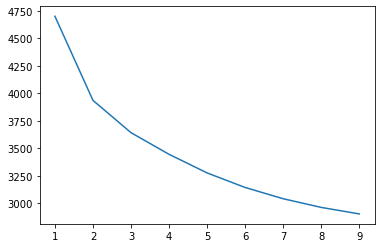

In [51]:
# Calculating inertia to choose ideal number of clusters
inertia_K5=[]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_clust_PCA5)
    inertia_K5.append(kmeanModel.inertia_)
plt.plot(K,inertia_K5)
plt.show()

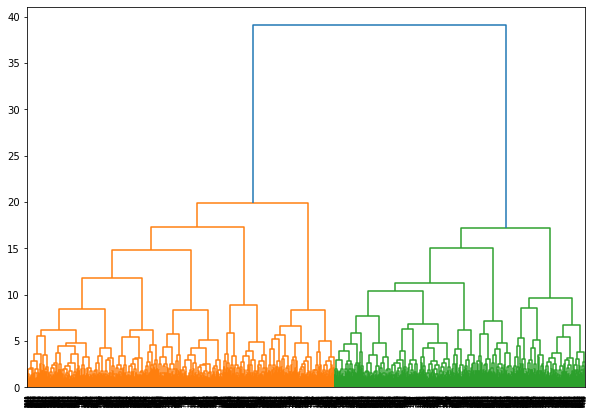

In [52]:
# For the purpose of visualising our dendrogram, we can go with a 'ward' dendrogram. 
# This is so since Ward's method is good at clustering when there is some noise between the clusters.
 
Z = linkage(df_clust_PCA5, method="ward")

plt.figure(figsize=(10, 7))
dendrogram(Z, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [53]:
# Defining K-means
kmeans_df5 = df_clust_PCA5.copy()
kmeans = KMeans(n_clusters=4).fit(kmeans_df5)

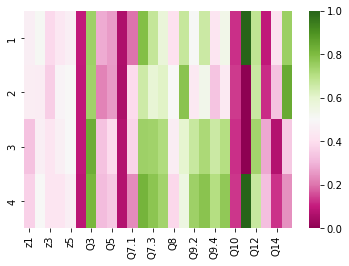

In [54]:
# Creating a heatmap to visualise the clusters

kmeans_df5["Labels"] = kmeans.labels_

kmeans_df5=kmeans_df5.groupby(kmeans_df5["Labels"]).mean().reset_index()
kmeans_df5=kmeans_df5.drop(columns=["Labels"]).set_index(np.arange(1,5))
sns.heatmap(kmeans_df5,cmap="PiYG")
plt.show()

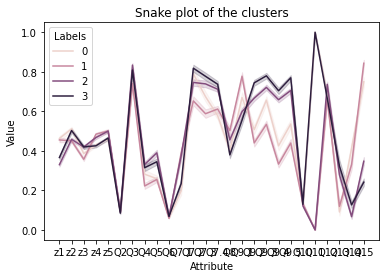

In [55]:
df_kmeans5 = df_clust_PCA5.copy()
df_kmeans5["Labels"]=kmeans.labels_

df_kmeans5_melt = pd.melt(df_kmeans5.reset_index(),
                            id_vars=['Labels'],
                            value_vars=kmeans_df5.columns,
                            var_name='Attribute',value_name='Value')
plt.title('Snake plot of the clusters')
sns.lineplot(x="Attribute", y="Value", hue='Labels', data=df_kmeans5_melt)
plt.show()

### 10 components

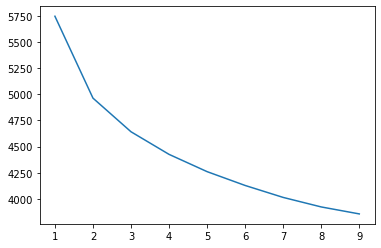

In [56]:
# Calculating inertia to choose ideal number of clusters
inertia_K10=[]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_clust_PCA10)
    inertia_K10.append(kmeanModel.inertia_)
plt.plot(K,inertia_K10)
plt.show()

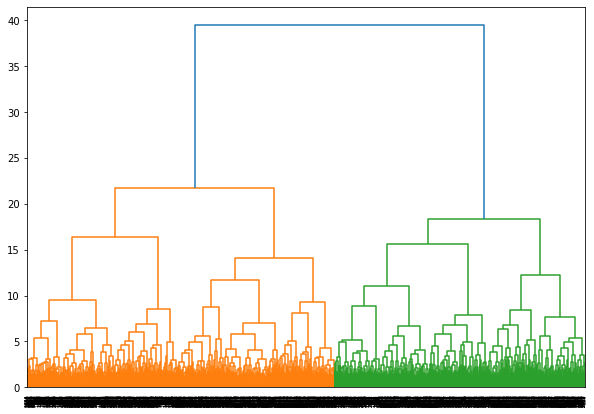

In [57]:
# For the purpose of visualising our dendrogram, we can go with a 'ward' dendrogram. 
# This is so since Ward's method is good at clustering when there is some noise between the clusters.
 
Z = linkage(df_clust_PCA10, method="ward")

plt.figure(figsize=(10, 7))
dendrogram(Z, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [58]:
# Defining K-means
kmeans_df10 = df_clust_PCA10.copy()
kmeans = KMeans(n_clusters=4).fit(kmeans_df10)

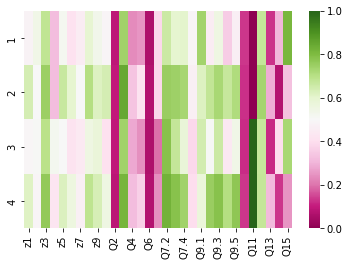

In [59]:
# Creating a heatmap to visualise the clusters

kmeans_df10["Labels"] = kmeans.labels_

kmeans_df10=kmeans_df10.groupby(kmeans_df10["Labels"]).mean().reset_index()
kmeans_df10=kmeans_df10.drop(columns=["Labels"]).set_index(np.arange(1,5))
sns.heatmap(kmeans_df10,cmap="PiYG")
plt.show()

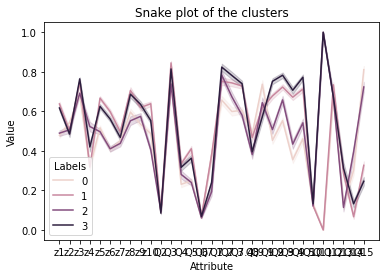

In [60]:
df_kmeans10 = df_clust_PCA10.copy()
df_kmeans10["Labels"]=kmeans.labels_

df_kmeans10_melt = pd.melt(df_kmeans10.reset_index(),
                            id_vars=['Labels'],
                            value_vars=kmeans_df10.columns,
                            var_name='Attribute',value_name='Value')
plt.title('Snake plot of the clusters')
sns.lineplot(x="Attribute", y="Value", hue='Labels', data=df_kmeans10_melt)
plt.show()

### 16 components

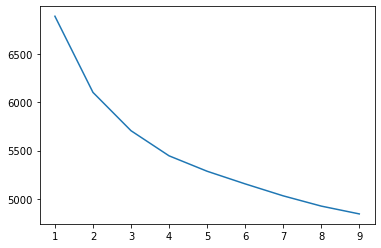

In [61]:
# Calculating inertia to choose ideal number of clusters
inertia_K16=[]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_clust_PCA16)
    inertia_K16.append(kmeanModel.inertia_)
plt.plot(K,inertia_K16)
plt.show()

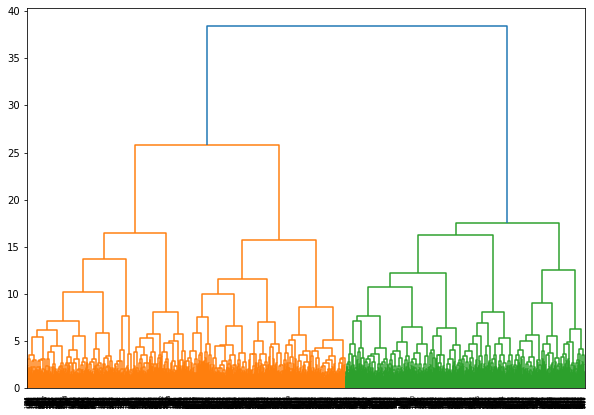

In [62]:
# For the purpose of visualising our dendrogram, we can go with a 'ward' dendrogram. 
# This is so since Ward's method is good at clustering when there is some noise between the clusters.
 
Z = linkage(df_clust_PCA16, method="ward")

plt.figure(figsize=(10, 7))
dendrogram(Z, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [63]:
# Defining K-means
kmeans_df16 = df_clust_PCA16.copy()
kmeans = KMeans(n_clusters=4).fit(kmeans_df16)

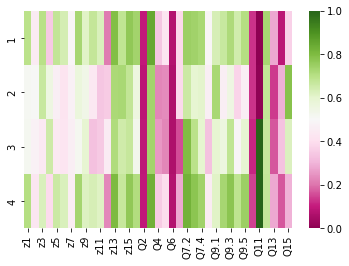

In [64]:
# Creating a heatmap to visualise the clusters

kmeans_df16["Labels"] = kmeans.labels_

kmeans_df16=kmeans_df16.groupby(kmeans_df16["Labels"]).mean().reset_index()
kmeans_df16=kmeans_df16.drop(columns=["Labels"]).set_index(np.arange(1,5))
sns.heatmap(kmeans_df16,cmap="PiYG")
plt.show()

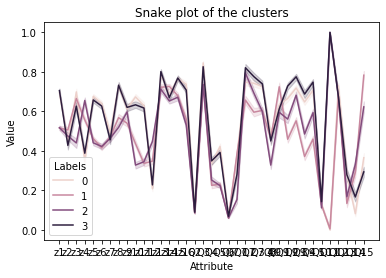

In [65]:
df_kmeans16 = df_clust_PCA16.copy()
df_kmeans16["Labels"]=kmeans.labels_

df_kmeans16_melt = pd.melt(df_kmeans16.reset_index(),
                            id_vars=['Labels'],
                            value_vars=kmeans_df16.columns,
                            var_name='Attribute',value_name='Value')
plt.title('Snake plot of the clusters')
sns.lineplot(x="Attribute", y="Value", hue='Labels', data=df_kmeans16_melt)
plt.show()

### Rationale for number of clusters:
The dataframe with 10 principal components was used for clustering. Minmax scaler was used on the complete dataframe before clustering. This was done to ensure every feature is interpretable along the same scale because not all questions had the same range of answers. For example, Q3 has answers ranging from 1 to 5 and Q4 from 1 to 11 - without scaling them, the calculation of distance between any 2 points may have been affected more by Q4's higher magnitude resulting in inaccurate outcomes.

Whilst looking at the inertia plot for K-means clustering, the drop in inertia added by an additional cluster was significant at k=2,3,4. From 4 onwards, adding more clusters did not bring more value compared to the increased complexity of the process. The dendrogram using the ward method did not have a major gap between the line cutting at 3 and 4 cluster levels. Hence, we decided to use K-means clustering and compare results for k=3 and k=4. The final snakeplot for 3 clusters had more overlapping than 4 clusters and the heatmap also showed similar cluster shades across every feature. Therefore, we were able to increase the within-cluster homegeneity and cross-cluster heterogeneity by using 4 clusters. From a business perspective, the difference in interpretability between 4 and 3 clusters is not too untenable especially when the 4 clusters allow better segmentation and hence improved targeting of the said clusters. 

# 5  - Cluster Profiles

In [66]:
df_profile = df_kmeans10.iloc[:,10:31]
df_profile['cluster_label'] = df_kmeans10["Labels"]
df_profile

,Q2,Q3,Q4,Q5,Q6,Q7.1,Q7.2,Q7.3,Q7.4,Q8,...,Q9.3,Q9.4,Q9.5,Q10,Q11,Q12,Q13,Q14,Q15,cluster_label
0,0.1,0.75,1.0,0.714286,0.272446,0.25,0.50,0.50,0.50,0.666667,...,0.75,0.75,0.75,0.273973,1.0,1.000000,0.8,0.0,0.333333,3
1,0.1,0.75,0.2,1.000000,0.071207,0.25,1.00,0.75,1.00,0.333333,...,0.75,1.00,0.75,0.082192,1.0,0.888889,0.8,0.0,0.000000,3
2,0.1,1.00,0.4,1.000000,0.058824,0.00,0.25,0.75,0.75,0.666667,...,0.75,0.75,0.75,0.082192,0.0,0.722222,0.8,0.0,0.000000,1
3,0.1,0.75,0.5,1.000000,0.061920,0.50,0.75,0.50,0.75,0.333333,...,0.75,0.50,0.25,0.082192,0.0,0.666667,0.8,0.0,0.000000,1
4,0.1,0.75,0.4,1.000000,0.068111,0.00,0.75,0.50,0.50,0.333333,...,0.50,0.50,0.50,0.082192,0.0,0.666667,0.8,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,0.3,1.00,0.2,0.000000,0.043344,0.25,0.75,0.50,0.75,0.666667,...,1.00,0.50,1.00,0.109589,1.0,0.944444,0.0,0.0,1.000000,2
2809,0.1,0.25,0.3,0.000000,0.052632,0.00,0.50,1.00,1.00,0.666667,...,0.25,1.00,0.00,0.060274,0.0,0.833333,0.0,0.0,0.666667,0
2810,0.1,0.75,0.3,0.000000,0.055728,0.50,0.75,0.50,0.50,0.333333,...,0.50,0.75,0.75,0.123288,0.0,0.777778,0.0,0.0,1.000000,0
2811,0.0,0.75,1.0,0.000000,0.055728,0.50,0.50,0.50,0.50,0.000000,...,0.50,0.50,0.50,0.005479,1.0,0.555556,0.8,0.0,0.333333,3


In [67]:
df_profile_grouped = df_profile.groupby(['cluster_label']).mean()
df_profile_grouped

,Q2,Q3,Q4,Q5,Q6,Q7.1,Q7.2,Q7.3,Q7.4,Q8,...,Q9.2,Q9.3,Q9.4,Q9.5,Q10,Q11,Q12,Q13,Q14,Q15
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,0.087919,0.739262,0.230872,0.248130,0.059555,0.382215,0.656711,0.598993,0.605034,0.484564,...,0.453020,0.552685,0.355034,0.461074,0.130301,0.0,0.673005,0.128054,0.301566,0.810738
1,0.094410,0.845031,0.334037,0.410470,0.068258,0.380435,0.751863,0.743789,0.727950,0.467081,...,0.677640,0.722981,0.671429,0.712733,0.122975,0.0,0.734092,0.286957,0.066667,0.326708
2,0.093651,0.738536,0.280600,0.240111,0.060751,0.192681,0.783510,0.673280,0.580247,0.382128,...,0.507496,0.657848,0.433862,0.541887,0.121060,1.0,0.671076,0.113933,0.395062,0.723104
3,0.084626,0.814296,0.316667,0.363095,0.068467,0.239583,0.823635,0.781250,0.739943,0.395594,...,0.751796,0.782687,0.706537,0.772270,0.131841,1.0,0.673292,0.312069,0.131944,0.246169


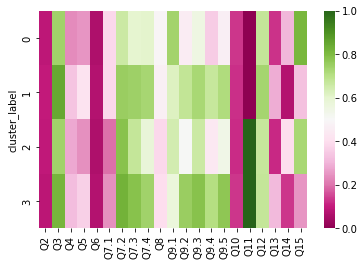

In [68]:
sns.heatmap(df_profile_grouped,cmap="PiYG")
plt.show()

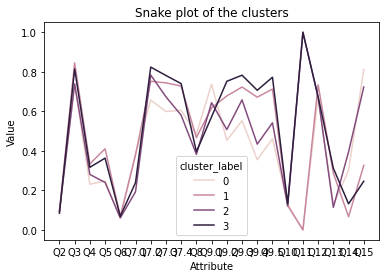

In [69]:
df_clust_melt = pd.melt(df_profile_grouped.reset_index(),
                            id_vars=['cluster_label'],
                        value_vars=df_profile_grouped.columns,
                         var_name= 'Attribute', value_name='Value' )
plt.title('Snake plot of the clusters')
df_clust_melt
sns.lineplot(x='Attribute',y='Value', data=df_clust_melt, hue='cluster_label')
plt.show()

In [70]:
df_profile_main = data.iloc[:,30:52]
df_profile_main.drop(columns=['Q2.Cluster'],inplace=True)

/Users/agamchug/.conda/envs/pythonProject1/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
df_profile_main['Customer_Cluster'] = df_kmeans10["Labels"]

/var/folders/zz/9yhsg1094_32rjdjwt0gvmpm0000gn/T/ipykernel_86672/2713812118.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
df_profile_overall = df_profile_main.describe().T

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_profile_overall['Overall Dataset'] = df_profile_overall[['mean']]
df_profile_overall = df_profile_overall[['Overall Dataset']]

# Cluster ID level summary
df_cluster_summary = df_profile_main.groupby('Customer_Cluster').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_cluster_summary = df_cluster_summary[df_cluster_summary['metric'] == "mean"]
df_cluster_summary = df_cluster_summary.set_index('column')

# join into single summary dataset
df_profile2 = df_cluster_summary.join(df_profile_overall) # joins on Index

In [73]:
df_profile2

,metric,0,1,2,3,Overall Dataset
column,,,,,,
Q2,mean,0.879195,0.944099,0.936508,0.846264,0.901173
Q3,mean,3.957047,4.380124,3.954145,4.257184,4.151795
Q4,mean,3.308725,4.340373,3.805996,4.166667,3.916459
Q5,mean,2.736913,3.873292,2.680776,3.541667,3.249911
Q6,mean,21.236242,24.047205,21.622575,24.114943,22.830786
Q7.1,mean,2.528859,2.521739,1.770723,1.958333,2.232847
Q7.2,mean,3.626846,4.007453,4.134039,4.294540,4.003199
Q7.3,mean,3.395973,3.975155,3.693122,4.125000,3.801991
Q7.4,mean,3.420134,3.911801,3.320988,3.959770,3.674369


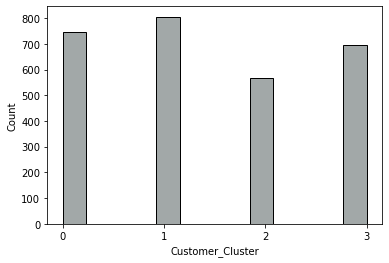

In [74]:
# Visualising a graph of customers under each cluster
fig, ax = plt.subplots()
K = sns.histplot(x='Customer_Cluster', data=df_profile_main, color="#838B8B")
K.set_xticks ([0, 1, 2, 3])
K.set_xticklabels = [0, 1, 2, 3]

### Key features of each cluster

##### Cluster 0 <br>
- Boat preferences - The members of cluster 0 probably will purchase one new boat and plan to spend between 30000 to 49999 USD on the same. The boat they are looking to purchase would have horsepower between 61-115 and 116-150. The boat should be about 24 feet long. <br>
- Boating habits - This cluster rarely boats alone, preferring to boat often with their spouse or significant other, family (including kids) or friends. This cluster has intermediate experience in boating, and while boating, they sometimes go fishing, often preferring to enjoy swimming, cruising, water sports and entertaining. Typically, during boating season, they use their boat for around 48 days. <br>
- Demographics - The cluster is dominantly female, having annual pre-tax household income between USD 60,000 and 74,999. They are mostly younger, divorced, and are self-employed.

##### Cluster 1 <br>
- Boat preferences - The members of cluster 1 probably will purchase one new boat and plan to spend between 20000 to 29999 USD on the same. The boat they are looking to purchase would have horsepower around 61-115. The boat should be about 21 feet long. <br>
- Boating habits - This cluster sometimes boats alone, preferring to boat sometimes with family (including kids) or friends but often with their spouse or significant other. This cluster has intermediate experience in boating, and while boating, they rarely partake in water sports, sometimes enjoying swimming, cruising and entertaining. They often go fishing. Typically, during boating season, they use their boat for around 48 days. <br>
- Demographics - The cluster is dominantly male, having annual pre-tax household income between USD 60,000 and 74,999. They are relatively older, widowed, and are not working, having been temporarily laid off from a job.

##### Cluster 2
- Boat preferences - The members of cluster 2 probably will purchase one new boat and plan to spend between 30000 to 49999 USD on the same. The boat they are looking to purchase would have horsepower around 116-150. The boat should be about 24 feet long. 
- Boating habits - This cluster sometimes boats alone, preferring to boat often with their spouse or significant other, family (including kids) or friends. This cluster has intermediate experience in boating, and while boating, they often partake in water sports, swimming, cruising and entertaining. They sometimes go fishing. Typically, during boating season, they use their boat for around 45 days.
- Demographics - The cluster is dominantly male, having annual pre-tax household income between USD 75,000 and 84,999. They are mostly younger, divorced, and are working as a paid employee.

##### Cluster 3 
- Boat preferences - The members of cluster 3 probably will purchase one new boat and plan to spend between 30000 to 49999 USD on the same. The boat they are looking to purchase would have horsepower around 61-115. The boat should be about 22 feet long. 
- Boating habits - This cluster rarely boats alone, preferring to boat sometimes with friends and often with their spouse or significant other, family (including kids). This cluster has intermediate experience in boating, and while boating, they sometimes partake in water sports, swimming and entertaining. They often go fishing or cruising. Typically, during boating season, they use their boat for around 44 days.
- Demographics - The cluster is dominantly female, having annual pre-tax household income between USD 60,000 and 74,999. They are relatively older, mostly widowed, and are not working, having been temporarily laid off from a job.

# 6  - Robustness

In order to understand how the results change with respect to the changes in the number of components used for clustering, we chose to compare 3 different clustering outputs. 
1. 5 components and alpha=0
2. 10 components and alpha=6
3. 16 components and alpha=12

The main analysis has been performed using 10 components and alpha=6.

The comparison was done using K-means clustering on all 3 choices by first inspecting the inertia plots and dendrograms to study the appropriate number of clusters each choice suggested. The inertia plot for 5 components showed a sharp elbow at 2 clusters and then at 3, and then from there it became smoother. Similarly in the dendrogram, 2 clusters was a direct choice, followed by 3 and 5. Picking 4 clusters was not an option here and 2 is not very fit to answer the business objectives. Whereas, with the 10 components the possibility of choosing 4 and 6 clusters arised by looking at the inertia plot and dendrogram. Lastly, using 16 components the possible clusters were 2, 3, 4, and 7, but 4 and 7 were very close in inertia. Overall, there were differences between the number of clusters that each component choice suggested with 3 clusters being the one in common. It was reassuring to notice that 10 components and 16 components both had options for 3 and 4 clusters (given that 16 components are supposed to explain more variance than 10 components). 

After choosing 4 clusters, the outcomes of the cluster traits were visualised for all 3 component choices using heatmaps and snakeplots. The clusters created by 5 components were very homogeneous since the heatmap showed the clusters having similar shades for many features. Even the snakeplots had lines overlapping at at about 6 points. 
With regards to the 10 components, there were relatively fewer instances of similar shades and the snakeplot lines merged at fewer points (at about 5 features). The outcome of the clusters created using 16 components was better and different from the one by 5 components. However, there appear to be about 7 features at which the snakeplot lines overlapped as compared to 5 in 10 components, which can be explained due to the addition of 6 more features than in the 10-component clusters. Keeping in mind the number of overlaps and the number of components used, the 5-component choice was the most different and least effective; whereas, the other two choices were somewhat similar. 10 components again withstood the trade-off of having too many features by using 16 components that weren't fitting into well defined clusters in a business context. 

# 7 - Recommendation <br>
Based on the segments you identify (and their likelihood of recommending and buying from CreeqBoat - Q.17 and Q.18 in the survey), what can you recommend CreeqBoat regarding the customer segments to target and the types of targeted boats to build?

In [75]:
df_profile_rec = data.iloc[:,53:]


# Cluster ID level summary
df_profile_rec['Customer_Cluster'] = df_kmeans10["Labels"]
df_cluster_rec = df_profile_rec.groupby('Customer_Cluster').mean().reset_index()

df_cluster_rec

/var/folders/zz/9yhsg1094_32rjdjwt0gvmpm0000gn/T/ipykernel_86672/3243017918.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer_Cluster,Q16.1,Q16.2,Q16.3,Q16.4,Q16.5,Q16.6,Q16.7,Q16.8,Q16.9,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,0,3.514094,3.452349,3.589262,3.628188,3.532886,3.677852,3.795973,3.824161,3.790604,...,3.859060,3.820134,3.877852,3.914094,3.191946,3.480537,3.804027,3.405369,0.308725,0.574497
1,1,3.780124,3.696894,3.874534,3.890683,3.873292,3.963975,4.037267,4.037267,4.013665,...,4.068323,3.976398,4.034783,4.060870,3.413665,3.832298,4.003727,3.834783,0.372671,0.442236
2,2,3.544974,3.423280,3.513228,3.578483,3.576720,3.641975,3.742504,3.728395,3.788360,...,3.874780,3.804233,3.790123,3.871252,3.167549,3.421517,3.747795,3.410935,0.289242,0.529101
3,3,3.765805,3.629310,3.839080,3.882184,3.804598,3.951149,4.012931,3.992816,4.021552,...,4.063218,4.033046,3.977011,4.081897,3.438218,3.788793,3.991379,3.803161,0.356322,0.456897


In [76]:
# Understanding the average responses per cluster per question from 16.X to 18
df_profile_main_recom = data.iloc[:,53:]

df_profile_main_recom['Customer_Cluster'] = df_kmeans10["Labels"]
#df_profile_main_recom["Response_ID"] = data["RESPID"]

df_profile_overall_recom = df_profile_main_recom.describe().T

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_profile_overall_recom['Overall Dataset'] = df_profile_overall_recom[['mean']]
df_profile_overall_recom = df_profile_overall_recom[['Overall Dataset']]

# Cluster ID level summary
df_cluster_summary_recom = df_profile_main_recom.groupby('Customer_Cluster').describe().T.reset_index()
df_cluster_summary_recom = df_cluster_summary_recom.rename(columns={'level_0':'column','level_1':'metric'})

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_cluster_summary_recom = df_cluster_summary_recom[df_cluster_summary_recom['metric'] == "mean"]
df_cluster_summary_recom = df_cluster_summary_recom.set_index('column')

# join into single summary dataset
df_profile3 = df_cluster_summary_recom.join(df_profile_overall_recom) # joins on Index
df_profile3 

/var/folders/zz/9yhsg1094_32rjdjwt0gvmpm0000gn/T/ipykernel_86672/1616458006.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,metric,0,1,2,3,Overall Dataset
column,,,,,,
Q16.1,mean,3.514094,3.780124,3.544974,3.765805,3.658727
Q16.2,mean,3.452349,3.696894,3.423280,3.629310,3.560256
Q16.3,mean,3.589262,3.874534,3.513228,3.839080,3.717384
Q16.4,mean,3.628188,3.890683,3.578483,3.882184,3.756132
Q16.5,mean,3.532886,3.873292,3.576720,3.804598,3.706363
Q16.6,mean,3.677852,3.963975,3.641975,3.951149,3.820121
Q16.7,mean,3.795973,4.037267,3.742504,4.012931,3.907927
Q16.8,mean,3.824161,4.037267,3.728395,3.992816,3.907572
Q16.9,mean,3.790604,4.013665,3.788360,4.021552,3.911127


#### Recommendations - Q 16.X:
- Customer service : Clusters 1 and 3 seem to have a neutral opinion about the customer service, whereas 0 and 2 agree that the customer service is satisfactory. It would thus make sense to improve our services toward clusters 1 and 3. <br>
- Boat size and power : Clusters 0 and 2, consistent with their responses to Qs 5 and 6, require longer boats with higher horsepower. It thus makes sense to market to the larger and more powerful boats produced by CreeqBoat toward these clusters especially since they _often_ entertain/socialise on their boats. <br>
- Appearance : Cluster 1 does not seem to be as pleased with the interiors or exteriors of the boats as the other clusters, who agree that the appearances are attractive. <br>
- Water sports : While Cluster 1 and 3 do not think that CreeqBoat offers the best boats for water sports, it is evident from Q 9 that Cluster 1 _rarely_ embarks on water sports while Cluster 3 _sometimes_ partakes. So, we can focus our marketing of water-sport related boats toward clusters 0 and 1, who _often_ partake in water sports <br>
- Pricing : All the clusters disagree that the prices are low. However, from Q 4, it is evident that clusters 0, 2 and 3 are willing to spend a higher amount (USD 30-50K) on a new boat. Particular focus maybe placed on cluster 2, who have a higher household income of USD 75-85K. <br>
- Emotional attachment and impressiveness : Clusters 0 and 2 have registered the highest scores for emotional attachment and intention to impress others with their boats. This is further backed by the fact that these clusters _often_ entertain people on their boats. Marketing of our premium boats and larger boats can be directed toward these clusters. <br>

#### Premise for Q 17 and 18 <br>
While looking at the average responses of each cluster as shown in the dataframe above, we are unable to gain any solid insight. Ultimately, Q17 seems to indicate that a very low percentage of the people surveyed recommend Creeqboat to their friends and family. Further, Q 18 seems to indicate that clusters 1 and 2 (who had answered that they do not intend to recommend CreeqBoat to their loved ones) actually want to buy the boat themselves in the future. Clearly, we seem to be missing a logical explanation to this. It would thus make sense to segregate the clusters based on a single objective question - Which of the members in these clusters currently own a boat?

##### Category 1 - Boat owners

In [77]:
df_profile_main_recom1 = data.iloc[:,80:]
df_profile_main_recom1["Current_owners"] = data["Q2"]
df_boat_owners = df_profile_main_recom1.query("Current_owners!=0")
df_boat_owners

/var/folders/zz/9yhsg1094_32rjdjwt0gvmpm0000gn/T/ipykernel_86672/3889513308.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Q17,Q18,Current_owners
0,0,1,1
1,1,1,1
2,1,0,1
3,1,0,1
4,0,0,1
...,...,...,...
2806,0,1,2
2807,0,0,1
2808,0,0,3
2809,0,0,1


In [78]:
# Finding mean per cluster for boat owners
df_boat_owners["Customer_Cluster"] = df_kmeans10["Labels"]
df_overall_boat_owners = df_boat_owners.describe().T

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_overall_boat_owners['Overall Dataset'] = df_overall_boat_owners[['mean']]
df_overall_boat_owners = df_overall_boat_owners[['Overall Dataset']]

# Cluster ID level summary
df_cluster_summary_owners = df_boat_owners.groupby('Customer_Cluster').describe().T.reset_index()
df_cluster_summary_owners = df_cluster_summary_owners.rename(columns={'level_0':'column','level_1':'metric'})

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_cluster_summary_owners = df_cluster_summary_owners[df_cluster_summary_owners['metric'] == "mean"]
df_cluster_summary_owners = df_cluster_summary_owners.set_index('column')

# join into single summary dataset
df_profile4 = df_cluster_summary_owners.join(df_overall_boat_owners) # joins on Index
df_profile4

/var/folders/zz/9yhsg1094_32rjdjwt0gvmpm0000gn/T/ipykernel_86672/3218810448.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,metric,0,1,2,3,Overall Dataset
column,,,,,,
Q17,mean,0.340426,0.404475,0.331839,0.392,0.368723
Q18,mean,0.583333,0.456110,0.542601,0.460,0.509804
Current_owners,mean,1.161348,1.308090,1.190583,1.178,1.212339


##### Category 2 - Non-Boat owners

In [79]:
df_profile_main_recom2 = data.iloc[:,53:]
df_profile_main_recom2["Current_owners"] = data["Q2"]
df_nonboat_owners = df_profile_main_recom1.query("Current_owners==0")
df_nonboat_owners

/var/folders/zz/9yhsg1094_32rjdjwt0gvmpm0000gn/T/ipykernel_86672/2869196957.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Q17,Q18,Current_owners
7,0,0,0
11,0,1,0
17,1,0,0
33,0,0,0
38,0,0,0
...,...,...,...
2785,0,0,0
2797,0,0,0
2805,0,1,0
2811,0,0,0


In [80]:
# Finding mean per cluster for nonboat owners
df_nonboat_owners["Customer_Cluster"] = df_kmeans10["Labels"]
df_overall_nonboat_owners = df_nonboat_owners.describe().T

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_overall_nonboat_owners['Overall Dataset'] = df_overall_nonboat_owners[['mean']]
df_overall_nonboat_owners = df_overall_nonboat_owners[['Overall Dataset']]

# Cluster ID level summary
df_cluster_summary_nonowners = df_nonboat_owners.groupby('Customer_Cluster').describe().T.reset_index()
df_cluster_summary_nonowners = df_cluster_summary_nonowners.rename(columns={'level_0':'column','level_1':'metric'})

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_cluster_summary_nonowners = df_cluster_summary_nonowners[df_cluster_summary_nonowners['metric'] == "mean"]
df_cluster_summary_nonowners = df_cluster_summary_nonowners.set_index('column')

# join into single summary dataset
df_profile5 = df_cluster_summary_nonowners.join(df_overall_nonboat_owners) # joins on Index
df_profile5

/var/folders/zz/9yhsg1094_32rjdjwt0gvmpm0000gn/T/ipykernel_86672/901281165.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,metric,0,1,2,3,Overall Dataset
column,,,,,,
Q17,mean,0.209945,0.290179,0.132231,0.265306,0.236842
Q18,mean,0.546961,0.406250,0.479339,0.448980,0.465374
Current_owners,mean,0.000000,0.000000,0.000000,0.000000,0.000000


#### Recommendations - Q 17 and 18 <br>

##### For people who currently own boats <br>
(Reference df_profile4) <br>
- While majority of the members in all 4 clusters are unlikely to recommend CreeqBoats to other boaters, cluster 2 is most likely to recommend CreeqBoats. It might make sense to target marketing toward them by providing them incentives for recommending boats to their acquaintances. It is also important to note that the percent of boat owners in cluster 2 (72%) is very high. <br>
- Also, it is interesting to note that while cluster 1 and 3 have the lowest percent of members willing to recommend CreeqBoats to others, they also have the highest percent of members intending to buy CreeqBoats in the event that they purchase another boat. This may possibly imply that they would like to maintain the exclusivity of owing CreeqBoats' boat. This maybe further looked into.

##### For people who do not currently own boats <br>
(Reference df_profile5) <br>
- Since these members do not themselves own a boat currently, it makes sense to ignore their responses to Q 17, since they might not be in a position to recommend CreeqBoats to others based on their own experiences. <br>
- Cluster 1 and 3 especially seem interested in purchasing a boat in the future. Based on the response to Q 4, cluster 3 has the highest budget for purchasing a boat at USD 30-50K. We can thus target this cluster in order to sell our products. Based on other answers from this cluster, we can market boats ideal for cruising and fishing (they go often).